In [65]:
import numpy as np
import pandas as pd


In [66]:
df=pd.read_csv("placement.csv")

In [67]:
df.shape

(100, 4)

In [68]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [69]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## Steps

### 0. Preprocess + EDA + Feature Selection
### 1. Extract input and output cols
### 2. Scale the values
### 3. Train test split
### 4. Train the model
### 5. Evaluate the model/model selection
### 6. Deploy the model

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [71]:
df=df.iloc[:,1:]

In [72]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [73]:
import matplotlib.pyplot as plt


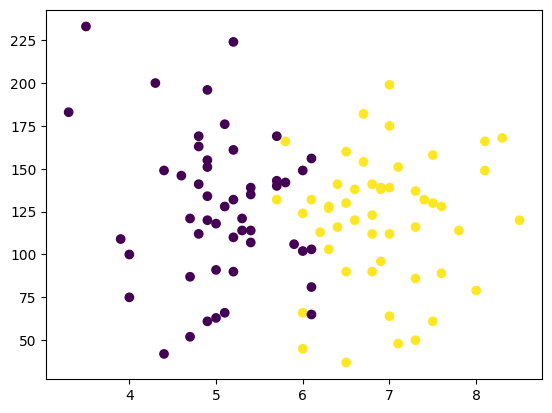

In [74]:
plt.scatter(df["cgpa"],df["iq"],c=df['placement'])

Extract input and output set


In [75]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

Train test splite

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [78]:
x_train

,cgpa,iq
69,8.5,120.0
8,6.1,156.0
81,5.4,107.0
46,5.3,114.0
18,4.0,100.0
...,...,...
43,6.8,141.0
15,5.1,176.0
24,4.7,121.0
75,4.8,169.0


In [79]:
y_train

69    1
8     0
81    0
46    0
18    0
     ..
43    1
15    0
24    0
75    0
51    0
Name: placement, Length: 90, dtype: int64

scale the dataset

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler=StandardScaler()

In [82]:
x_train=scaler.fit_transform(x_train)
x_train

array([[ 2.16866807, -0.09856908],
       [ 0.10418018,  0.82444776],
       [-0.49796213, -0.43188072],
       [-0.58398246, -0.25240522],
       [-1.70224673, -0.61135622],
       [-0.67000279,  0.2091032 ],
       [-0.67000279,  2.56792401],
       [-0.15388081,  1.08084132],
       [ 0.70632248, -0.02165101],
       [-1.35816542, -2.0984389 ],
       [ 0.87836314,  1.92694009],
       [-0.49796213, -0.25240522],
       [ 0.27622083,  0.08090641],
       [-0.06786048, -0.45752008],
       [-1.18612476,  0.56805419],
       [ 0.44826149, -0.86774978],
       [ 0.62030215,  1.49107103],
       [ 1.30846478,  0.15782448],
       [-0.92806377,  1.85002202],
       [-0.84204344, -0.1498478 ],
       [-0.92806377,  0.69625097],
       [ 1.13642413,  0.33729998],
       [-1.78826706, -0.38060201],
       [ 1.13642413, -0.20112651],
       [ 0.27622083, -0.53443815],
       [ 0.87836314,  0.38857869],
       [ 1.22244445,  0.2091032 ],
       [ 0.10418018, -0.53443815],
       [ 0.87836314,

In [83]:
x_test=scaler.fit_transform(x_test)

In [84]:
x_test

array([[ 0.45525145,  0.8469355 ],
       [-1.59338009, -1.51051383],
       [ 0.56906432, -0.02619388],
       [ 1.02431577,  1.17435902],
       [ 0.        , -0.87749503],
       [-0.11381286,  0.06111906],
       [-0.11381286, -1.20491854],
       [ 0.91050291, -0.55007151],
       [-2.04863154,  1.72006488],
       [ 0.91050291,  0.36671434]])

Train the model

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
clf = LogisticRegression()

In [87]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [88]:
#Evaluate the model/model selection
ypred=clf.predict(x_test)

In [89]:
y_test

38    1
94    0
20    1
52    1
78    0
27    1
45    1
66    1
95    0
11    1
Name: placement, dtype: int64

In [90]:
# test accuracy
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test,ypred)

0.8

In [92]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

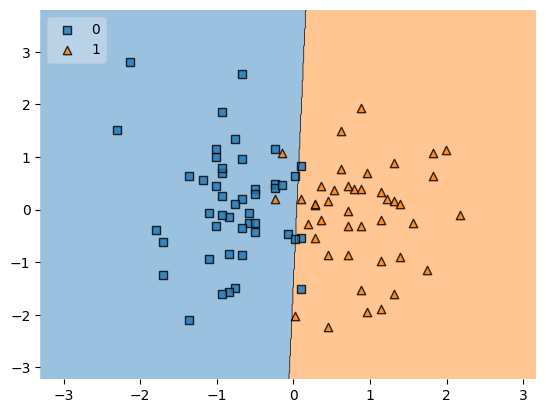

In [93]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [94]:
import pickle


In [95]:
# create a ready file to implement anywhere
pickle.dump(clf,open("ready.pkl","wb"))